In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("Delhi Climate Data 2013.csv", index_col="date", parse_dates=True)  

In [4]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [5]:
df.index.freq = "D" 

In [6]:
df = df.dropna()

In [7]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


<AxesSubplot:>

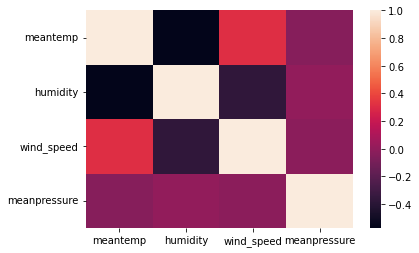

In [8]:
sns.heatmap(df.corr()) 

In [9]:
train = df.iloc[:1097, 0]
test = df.iloc[1097:, 0] 

In [10]:
train

date
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2015-12-29    16.375000
2015-12-30    15.500000
2015-12-31    15.000000
2016-01-01    14.714286
2016-01-02    14.000000
Freq: D, Name: meantemp, Length: 1097, dtype: float64

In [11]:
test

date
2016-01-03    14.375000
2016-01-04    15.750000
2016-01-05    15.833333
2016-01-06    17.375000
2016-01-07    17.125000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Freq: D, Name: meantemp, Length: 365, dtype: float64

In [12]:
exo = df.iloc[:, 1:4] 

In [13]:
exo

,humidity,wind_speed,meanpressure
date,,,
2013-01-01,84.500000,0.000000,1015.666667
2013-01-02,92.000000,2.980000,1017.800000
2013-01-03,87.000000,4.633333,1018.666667
2013-01-04,71.333333,1.233333,1017.166667
2013-01-05,86.833333,3.700000,1016.500000
...,...,...,...
2016-12-28,68.043478,3.547826,1015.565217
2016-12-29,87.857143,6.000000,1016.904762
2016-12-30,89.666667,6.266667,1017.904762


In [14]:
exo_train = df.iloc[:1097, 1:4] 

In [15]:
exo_train

,humidity,wind_speed,meanpressure
date,,,
2013-01-01,84.500000,0.000000,1015.666667
2013-01-02,92.000000,2.980000,1017.800000
2013-01-03,87.000000,4.633333,1018.666667
2013-01-04,71.333333,1.233333,1017.166667
2013-01-05,86.833333,3.700000,1016.500000
...,...,...,...
2015-12-29,65.000000,7.412500,1018.125000
2015-12-30,71.750000,2.100000,1017.500000
2015-12-31,71.375000,2.087500,1020.500000


In [16]:
exo_test = df.iloc[1097:, 1:4] 

In [17]:
exo_test

,humidity,wind_speed,meanpressure
date,,,
2016-01-03,74.750000,5.112500,1018.500000
2016-01-04,77.125000,0.000000,1017.625000
2016-01-05,88.833333,0.616667,1017.000000
2016-01-06,81.625000,2.312500,1016.500000
2016-01-07,87.000000,0.000000,1018.125000
...,...,...,...
2016-12-28,68.043478,3.547826,1015.565217
2016-12-29,87.857143,6.000000,1016.904762
2016-12-30,89.666667,6.266667,1017.904762


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose 

In [19]:
Decomp_Results = seasonal_decompose(df["meantemp"]) 

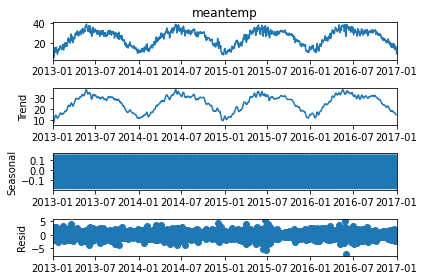

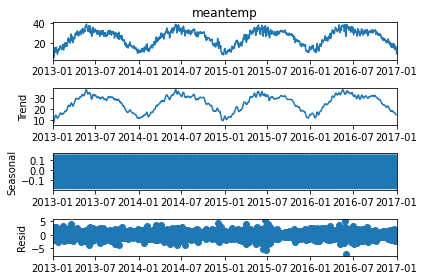

In [20]:
Decomp_Results.plot()

<AxesSubplot:xlabel='date'>

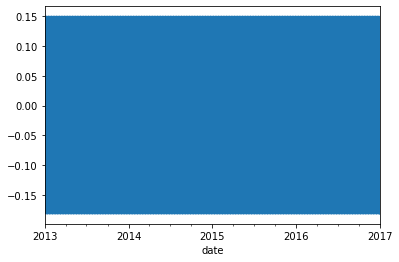

In [21]:
Decomp_Results.seasonal.plot() 

<AxesSubplot:xlabel='date'>

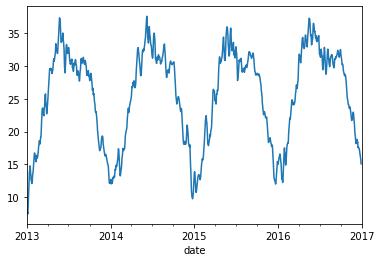

In [22]:
Decomp_Results.trend.plot() 

<AxesSubplot:xlabel='date'>

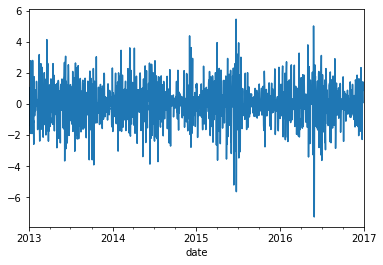

In [23]:
Decomp_Results.resid.plot() 

In [24]:
from pmdarima import auto_arima 

In [25]:
auto_arima(df["meantemp"], exogenous=exo, m=7, trace=True, D=1).summary() 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=7.17 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=7316.584, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=6027.641, Time=1.19 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=6505.858, Time=0.72 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=7314.795, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=6414.758, Time=0.27 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=5898.741, Time=2.56 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=4.61 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=4.32 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=7165.176, Time=3.70 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=5890.349, Time=2.75 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=6025.791, Time=1.58 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=12.13 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=5.00 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=5891.253, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1462
Model:             SARIMAX(3, 0, 2)x(2, 1, [], 7)   Log Likelihood               -2922.902
Date:                            Sun, 12 Mar 2023   AIC                           5861.804
Time:                                    19:39:23   BIC                           5904.066
Sample:                                01-01-2013   HQIC                          5877.572
                                     - 01-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6806      0.032     21.236      0.000       0.618       0.743
ar.L2          0.9854      0.012     84.294      0.000       0.963       1.008
ar.L3         -0.6758      0.029    -23.358      0.000      -0.733      -0.619
ma.L1          0.0446      0.024      1.871      0.061      -0.002       0.091
ma.L2         -0.9258      0.023    -40.858      0.000      -0.970      -0.881
ar.S.L7       -0.6606      0.023    -29.062      0.000      -0.705      -0.616
ar.S.L14      -0.3329      0.023    -14.264      0.000      -0.379      -0.287
sigma2         3.2434      0.092     35.377      0.000       3.064       3.423
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               231.44
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
#ARIMA(3,0,2)(2,1,0)[7]    

#seasonal order 

#P: 2
#D: 1
#Q: 0  
#s = 7  

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [28]:
Model = SARIMAX(train, exog=exo_train, order=(3,0,2), seasonal_order=(2,1,0,7))  

In [29]:
Model = Model.fit() 

C:\Users\alexh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\alexh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\alexh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
prediction = Model.predict(len(train), len(train) +len(test)-1, exog=exo_test, type="Levels") 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


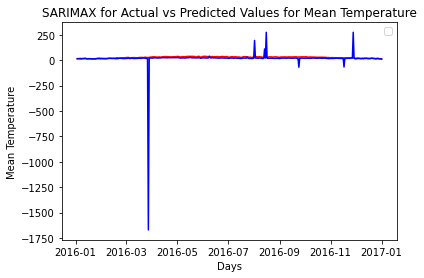

In [31]:
plt.plot(test, color="red")
plt.plot(prediction, color="blue")
plt.title("SARIMAX for Actual vs Predicted Values for Mean Temperature")
plt.xlabel("Days")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

In [32]:
import math
from sklearn.metrics import mean_squared_error

In [33]:
math.sqrt(mean_squared_error(test, prediction))

91.89107295593251

In [34]:
df = pd.read_csv("Delhi Climate Data 2013.csv", index_col="date", parse_dates=True)

In [35]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [36]:
df.index.freq = "D"

In [37]:
df.dropna()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [38]:
df = df[["humidity", "meantemp", "wind_speed", "meanpressure"]]

<AxesSubplot:>

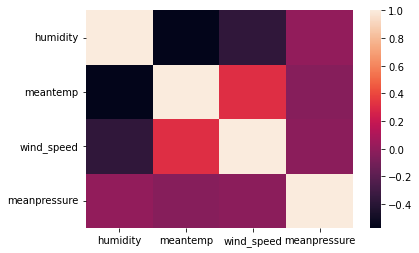

In [40]:
sns.heatmap(df.corr()) 

In [41]:
train = df.iloc[:1097, 0]
test = df.iloc[1097:, 0]

In [42]:
train

date
2013-01-01    84.500000
2013-01-02    92.000000
2013-01-03    87.000000
2013-01-04    71.333333
2013-01-05    86.833333
                ...    
2015-12-29    65.000000
2015-12-30    71.750000
2015-12-31    71.375000
2016-01-01    72.285714
2016-01-02    75.875000
Freq: D, Name: humidity, Length: 1097, dtype: float64

In [43]:
test

date
2016-01-03     74.750000
2016-01-04     77.125000
2016-01-05     88.833333
2016-01-06     81.625000
2016-01-07     87.000000
                 ...    
2016-12-28     68.043478
2016-12-29     87.857143
2016-12-30     89.666667
2016-12-31     87.000000
2017-01-01    100.000000
Freq: D, Name: humidity, Length: 365, dtype: float64

In [44]:
exo = df.iloc[:, 1:4] 

In [45]:
exo

,meantemp,wind_speed,meanpressure
date,,,
2013-01-01,10.000000,0.000000,1015.666667
2013-01-02,7.400000,2.980000,1017.800000
2013-01-03,7.166667,4.633333,1018.666667
2013-01-04,8.666667,1.233333,1017.166667
2013-01-05,6.000000,3.700000,1016.500000
...,...,...,...
2016-12-28,17.217391,3.547826,1015.565217
2016-12-29,15.238095,6.000000,1016.904762
2016-12-30,14.095238,6.266667,1017.904762


In [46]:
exo_train = df.iloc[:1097, 1:4] 

In [47]:
exo_train

,meantemp,wind_speed,meanpressure
date,,,
2013-01-01,10.000000,0.000000,1015.666667
2013-01-02,7.400000,2.980000,1017.800000
2013-01-03,7.166667,4.633333,1018.666667
2013-01-04,8.666667,1.233333,1017.166667
2013-01-05,6.000000,3.700000,1016.500000
...,...,...,...
2015-12-29,16.375000,7.412500,1018.125000
2015-12-30,15.500000,2.100000,1017.500000
2015-12-31,15.000000,2.087500,1020.500000


In [48]:
exo_test = df.iloc[1097:, 1:4] 

In [49]:
exo_test 

,meantemp,wind_speed,meanpressure
date,,,
2016-01-03,14.375000,5.112500,1018.500000
2016-01-04,15.750000,0.000000,1017.625000
2016-01-05,15.833333,0.616667,1017.000000
2016-01-06,17.375000,2.312500,1016.500000
2016-01-07,17.125000,0.000000,1018.125000
...,...,...,...
2016-12-28,17.217391,3.547826,1015.565217
2016-12-29,15.238095,6.000000,1016.904762
2016-12-30,14.095238,6.266667,1017.904762


In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose 

In [52]:
Seasonal_Results = seasonal_decompose(df["humidity"])

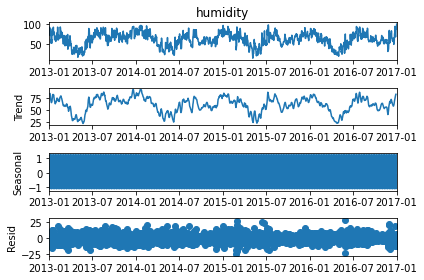

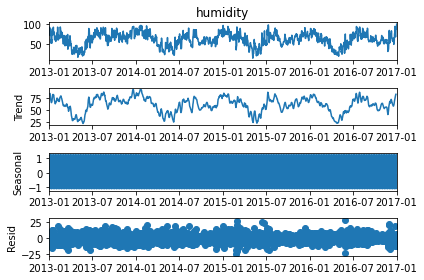

In [53]:
Seasonal_Results.plot() 

<AxesSubplot:xlabel='date'>

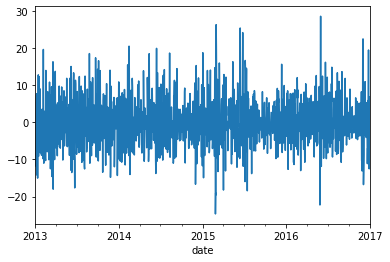

In [54]:
Seasonal_Results.resid.plot() 

<AxesSubplot:xlabel='date'>

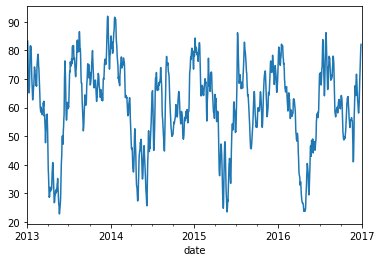

In [55]:
Seasonal_Results.trend.plot() 

<AxesSubplot:xlabel='date'>

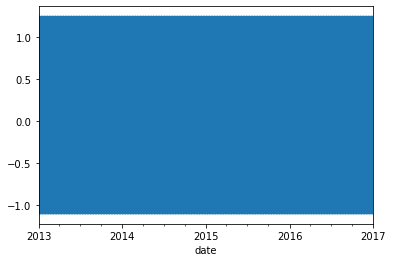

In [56]:
Seasonal_Results.seasonal.plot() 

In [57]:
from pmdarima import auto_arima 

In [58]:
auto_arima(train, exogenous=exo, trace=True, m=7, D=1).summary() 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=6.57 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=8934.110, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=8007.238, Time=2.09 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=8158.652, Time=0.67 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=8932.159, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=8328.790, Time=0.26 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=7891.508, Time=2.56 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=5.99 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=2.80 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=8676.485, Time=6.08 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=7893.392, Time=3.04 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=7893.378, Time=4.01 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=8175.282, Time=3.58 sec
 ARIMA(2,0,1)(2,1,0)[7] intercept   : AIC=7892.620, Time=4.33 sec
 ARIMA(1,0,0)(2,1,0)[7]             : AIC=7889.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1097
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 7)   Log Likelihood               -3940.762
Date:                           Sun, 12 Mar 2023   AIC                           7889.525
Time:                                   19:44:34   BIC                           7909.500
Sample:                               01-01-2013   HQIC                          7897.085
                                    - 01-02-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7287      0.020     36.612      0.000       0.690       0.768
ar.S.L7       -0.6789      0.027    -25.249      0.000      -0.732      -0.626
ar.S.L14      -0.3267      0.026    -12.557      0.000      -0.378      -0.276
sigma2        80.5525      2.752     29.266      0.000      75.158      85.947
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               100.21
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.42
Prob(H) (two-sided):                  0.11   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#ARIMA(1,0,0)(2,1,0)[7] 

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [65]:
Model = SARIMAX(train, order=(1, 0, 0), seasonal_order=(2, 1, 0, 7)) 

In [66]:
Model = Model.fit() 

In [71]:
predicted = Model.predict(start=len(train), end=len(train) + len(test)- 1, exog=exo_test, type="Levels") 

In [72]:
predicted

2016-01-03    67.028053
2016-01-04    65.841391
2016-01-05    69.918351
2016-01-06    73.132202
2016-01-07    71.166015
                ...    
2016-12-28    74.009036
2016-12-29    70.824356
2016-12-30    70.041549
2016-12-31    71.380149
2017-01-01    66.279277
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


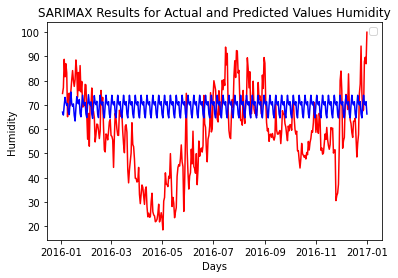

In [73]:
plt.plot(test, color="red")
plt.plot(predicted, color="blue")
plt.title("SARIMAX Results for Actual and Predicted Values Humidity")
plt.xlabel("Days")
plt.ylabel("Humidity")
plt.legend()
plt.show() 

In [74]:
import math
from sklearn.metrics import mean_squared_error 

In [75]:
RMSE = math.sqrt(mean_squared_error(test, predicted)) 

In [76]:
RMSE

20.08195864754004

In [77]:
#round 3 

In [78]:
df = pd.read_csv("Delhi Climate Data 2013.csv", index_col="date", parse_dates=True) 

In [79]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [80]:
df.index.freq = "D" 

In [81]:
df = df.dropna()

In [82]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [83]:
df = df[["wind_speed", "meantemp", "humidity", "meanpressure"]] 

In [84]:
df

,wind_speed,meantemp,humidity,meanpressure
date,,,,
2013-01-01,0.000000,10.000000,84.500000,1015.666667
2013-01-02,2.980000,7.400000,92.000000,1017.800000
2013-01-03,4.633333,7.166667,87.000000,1018.666667
2013-01-04,1.233333,8.666667,71.333333,1017.166667
2013-01-05,3.700000,6.000000,86.833333,1016.500000
...,...,...,...,...
2016-12-28,3.547826,17.217391,68.043478,1015.565217
2016-12-29,6.000000,15.238095,87.857143,1016.904762
2016-12-30,6.266667,14.095238,89.666667,1017.904762


<AxesSubplot:>

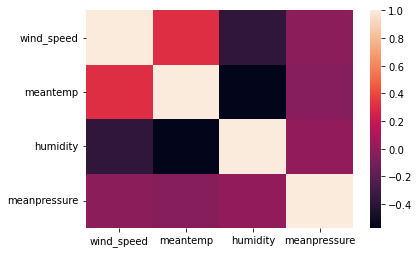

In [93]:
sns.heatmap(df.corr()) 

In [85]:
train = df.iloc[:1097, 0]
test = df.iloc[1097:, 0] 

In [86]:
train

date
2013-01-01    0.000000
2013-01-02    2.980000
2013-01-03    4.633333
2013-01-04    1.233333
2013-01-05    3.700000
                ...   
2015-12-29    7.412500
2015-12-30    2.100000
2015-12-31    2.087500
2016-01-01    1.057143
2016-01-02    2.087500
Freq: D, Name: wind_speed, Length: 1097, dtype: float64

In [87]:
test

date
2016-01-03    5.112500
2016-01-04    0.000000
2016-01-05    0.616667
2016-01-06    2.312500
2016-01-07    0.000000
                ...   
2016-12-28    3.547826
2016-12-29    6.000000
2016-12-30    6.266667
2016-12-31    7.325000
2017-01-01    0.000000
Freq: D, Name: wind_speed, Length: 365, dtype: float64

In [88]:
exo = df.iloc[:, 1:4] 

In [89]:
exo

,meantemp,humidity,meanpressure
date,,,
2013-01-01,10.000000,84.500000,1015.666667
2013-01-02,7.400000,92.000000,1017.800000
2013-01-03,7.166667,87.000000,1018.666667
2013-01-04,8.666667,71.333333,1017.166667
2013-01-05,6.000000,86.833333,1016.500000
...,...,...,...
2016-12-28,17.217391,68.043478,1015.565217
2016-12-29,15.238095,87.857143,1016.904762
2016-12-30,14.095238,89.666667,1017.904762


In [90]:
exo_train = df.iloc[:1097, 1:4] 
exo_test = df.iloc[1097:, 1:4] 

In [91]:
exo_train

,meantemp,humidity,meanpressure
date,,,
2013-01-01,10.000000,84.500000,1015.666667
2013-01-02,7.400000,92.000000,1017.800000
2013-01-03,7.166667,87.000000,1018.666667
2013-01-04,8.666667,71.333333,1017.166667
2013-01-05,6.000000,86.833333,1016.500000
...,...,...,...
2015-12-29,16.375000,65.000000,1018.125000
2015-12-30,15.500000,71.750000,1017.500000
2015-12-31,15.000000,71.375000,1020.500000


In [92]:
exo_test 

,meantemp,humidity,meanpressure
date,,,
2016-01-03,14.375000,74.750000,1018.500000
2016-01-04,15.750000,77.125000,1017.625000
2016-01-05,15.833333,88.833333,1017.000000
2016-01-06,17.375000,81.625000,1016.500000
2016-01-07,17.125000,87.000000,1018.125000
...,...,...,...
2016-12-28,17.217391,68.043478,1015.565217
2016-12-29,15.238095,87.857143,1016.904762
2016-12-30,14.095238,89.666667,1017.904762


In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [95]:
Seasonal_Results = seasonal_decompose(df["wind_speed"]) 

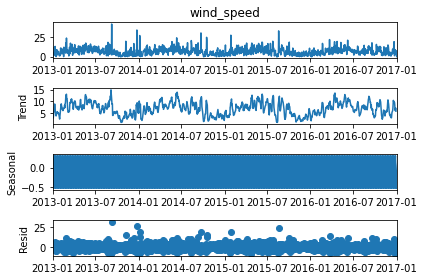

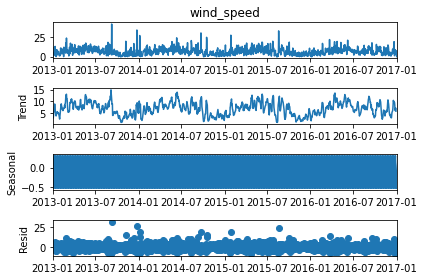

In [97]:
Seasonal_Results.plot() 

<AxesSubplot:xlabel='date'>

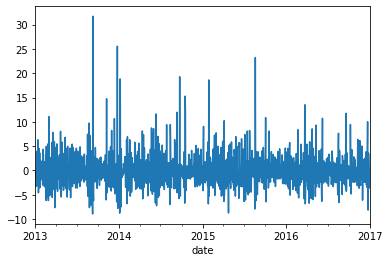

In [98]:
Seasonal_Results.resid.plot()

<AxesSubplot:xlabel='date'>

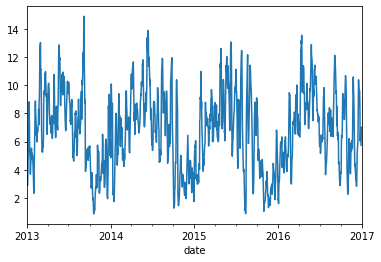

In [99]:
Seasonal_Results.trend.plot()

<AxesSubplot:xlabel='date'>

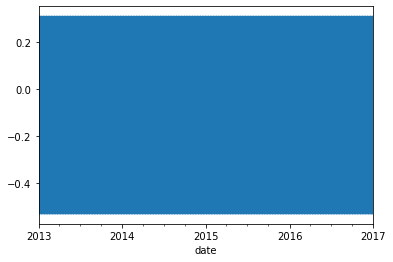

In [100]:
Seasonal_Results.seasonal.plot()

In [101]:
from pmdarima import auto_arima

In [102]:
auto_arima(df["wind_speed"], trace=True, exogenous=exo, m=7, D=1).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=7.28 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=9312.460, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=8745.261, Time=1.45 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=8327.233, Time=1.02 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=9310.468, Time=0.08 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=9139.330, Time=0.44 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=8328.467, Time=1.39 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=8328.491, Time=3.01 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=8755.348, Time=1.28 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=8330.688, Time=2.40 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=8541.463, Time=0.88 sec
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=2.05 sec
 ARIMA(0,0,2)(0,1,1)[7] intercept   : AIC=8303.764, Time=1.70 sec
 ARIMA(0,0,2)(0,1,0)[7] intercept   : AIC=9127.169, Time=0.67 sec
 ARIMA(0,0,2)(1,1,1)[7] intercept   : AIC=i

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1462
Model:             SARIMAX(0, 0, 2)x(0, 1, [1], 7)   Log Likelihood               -4146.891
Date:                             Sun, 12 Mar 2023   AIC                           8301.782
Time:                                     20:18:42   BIC                           8322.913
Sample:                                 01-01-2013   HQIC                          8309.666
                                      - 01-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4035      0.016     25.251      0.000       0.372       0.435
ma.L2          0.1320      0.025      5.305      0.000       0.083       0.181
ma.S.L7       -0.9236      0.010    -91.462      0.000      -0.943      -0.904
sigma2        17.3395      0.294     58.925      0.000      16.763      17.916
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):              4742.88
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                             1.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [105]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [110]:
Model = SARIMAX(train, exog=exo_train, order=(0, 0, 2), seasonal_order=(0, 1, 1, 7)) 

In [111]:
Model = Model.fit() 

In [112]:
predicted = Model.predict(start=len(train), end=len(train) + len(test)-1, exog=exo_test, type="Levels") 

In [113]:
predicted

2016-01-03    3.538698
2016-01-04    3.827586
2016-01-05    2.899201
2016-01-06    4.033954
2016-01-07    2.392785
                ...   
2016-12-28    5.802175
2016-12-29    2.888127
2016-12-30    2.643539
2016-12-31    3.026119
2017-01-01    2.373217
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


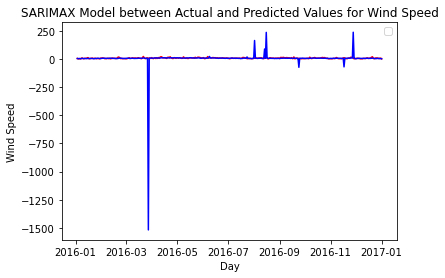

In [114]:
plt.plot(test, color="red")
plt.plot(predicted, color="blue")
plt.title("SARIMAX Model between Actual and Predicted Values for Wind Speed")
plt.xlabel("Day")
plt.ylabel("Wind Speed")
plt.legend()
plt.show()

In [115]:
import math 
from sklearn.metrics import mean_squared_error 

In [116]:
RMSE = math.sqrt(mean_squared_error(test, predicted))

In [117]:
RMSE

82.31588993776316

In [118]:
df = pd.read_csv("Delhi Climate Data 2013.csv", index_col="date", parse_dates=True)

In [119]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [120]:
df.index.freq="D" 

In [122]:
df = df.dropna()

In [123]:
df = df[["meanpressure", "meantemp", "humidity", "wind_speed"]] 

In [124]:
df

,meanpressure,meantemp,humidity,wind_speed
date,,,,
2013-01-01,1015.666667,10.000000,84.500000,0.000000
2013-01-02,1017.800000,7.400000,92.000000,2.980000
2013-01-03,1018.666667,7.166667,87.000000,4.633333
2013-01-04,1017.166667,8.666667,71.333333,1.233333
2013-01-05,1016.500000,6.000000,86.833333,3.700000
...,...,...,...,...
2016-12-28,1015.565217,17.217391,68.043478,3.547826
2016-12-29,1016.904762,15.238095,87.857143,6.000000
2016-12-30,1017.904762,14.095238,89.666667,6.266667


<AxesSubplot:>

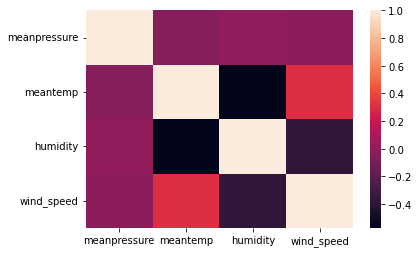

In [125]:
sns.heatmap(df.corr())

In [126]:
train = df.iloc[:1097, 0]
test = df.iloc[1097:, 0] 

In [127]:
train

date
2013-01-01    1015.666667
2013-01-02    1017.800000
2013-01-03    1018.666667
2013-01-04    1017.166667
2013-01-05    1016.500000
                 ...     
2015-12-29    1018.125000
2015-12-30    1017.500000
2015-12-31    1020.500000
2016-01-01    1021.142857
2016-01-02    1021.000000
Freq: D, Name: meanpressure, Length: 1097, dtype: float64

In [128]:
test

date
2016-01-03    1018.500000
2016-01-04    1017.625000
2016-01-05    1017.000000
2016-01-06    1016.500000
2016-01-07    1018.125000
                 ...     
2016-12-28    1015.565217
2016-12-29    1016.904762
2016-12-30    1017.904762
2016-12-31    1016.100000
2017-01-01    1016.000000
Freq: D, Name: meanpressure, Length: 365, dtype: float64

In [129]:
exo = df.iloc[:, 1:4]

In [133]:
exo

,meantemp,humidity,wind_speed
date,,,
2013-01-01,10.000000,84.500000,0.000000
2013-01-02,7.400000,92.000000,2.980000
2013-01-03,7.166667,87.000000,4.633333
2013-01-04,8.666667,71.333333,1.233333
2013-01-05,6.000000,86.833333,3.700000
...,...,...,...
2016-12-28,17.217391,68.043478,3.547826
2016-12-29,15.238095,87.857143,6.000000
2016-12-30,14.095238,89.666667,6.266667


In [130]:
exo_train = df.iloc[:1097, 1:4]
exo_test = df.iloc[1097:, 1:4] 

In [131]:
exo_train

,meantemp,humidity,wind_speed
date,,,
2013-01-01,10.000000,84.500000,0.000000
2013-01-02,7.400000,92.000000,2.980000
2013-01-03,7.166667,87.000000,4.633333
2013-01-04,8.666667,71.333333,1.233333
2013-01-05,6.000000,86.833333,3.700000
...,...,...,...
2015-12-29,16.375000,65.000000,7.412500
2015-12-30,15.500000,71.750000,2.100000
2015-12-31,15.000000,71.375000,2.087500


In [132]:
exo_test 

,meantemp,humidity,wind_speed
date,,,
2016-01-03,14.375000,74.750000,5.112500
2016-01-04,15.750000,77.125000,0.000000
2016-01-05,15.833333,88.833333,0.616667
2016-01-06,17.375000,81.625000,2.312500
2016-01-07,17.125000,87.000000,0.000000
...,...,...,...
2016-12-28,17.217391,68.043478,3.547826
2016-12-29,15.238095,87.857143,6.000000
2016-12-30,14.095238,89.666667,6.266667


In [134]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [135]:
Seasonal_Results = seasonal_decompose(df["meanpressure"])

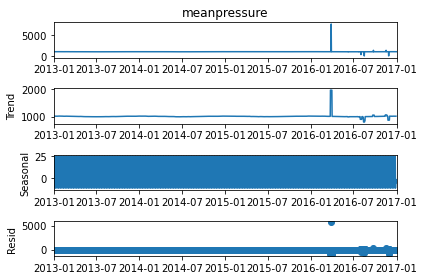

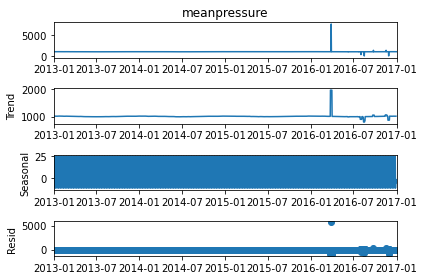

In [136]:
Seasonal_Results.plot()

<AxesSubplot:xlabel='date'>

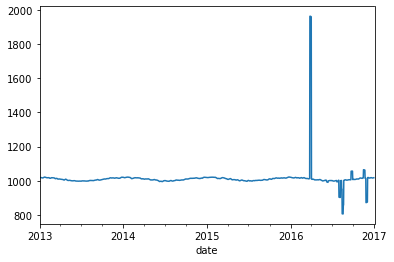

In [137]:
Seasonal_Results.trend.plot()

<AxesSubplot:xlabel='date'>

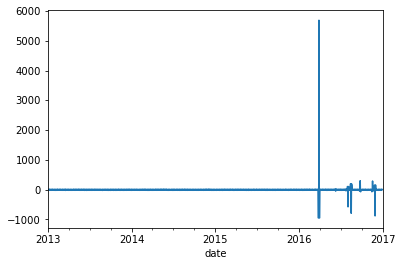

In [139]:
Seasonal_Results.resid.plot()

<AxesSubplot:xlabel='date'>

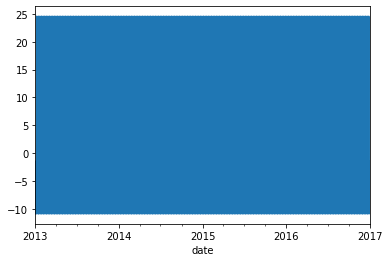

In [140]:
Seasonal_Results.seasonal.plot()

In [142]:
from pmdarima import auto_arima

In [143]:
auto_arima(df["meanpressure"], trace=True, exogenous=exo, m=7, D=1).summary() 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=4.04 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=20260.106, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=19832.446, Time=1.72 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=20258.106, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=20262.104, Time=0.12 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=19671.920, Time=3.84 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=5.08 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=2.27 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=19669.922, Time=20.56 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=19830.447, Time=4.38 sec
 ARIMA(0,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=3.58 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=1.32 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=19671.920, Time=3.52 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=19673.903, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:                       y   No. Observations:                 1462
Model:             SARIMAX(2, 1, 0, 7)   Log Likelihood               -9830.995
Date:                 Sun, 12 Mar 2023   AIC                          19667.990
Time:                         20:45:38   BIC                          19683.838
Sample:                     01-01-2013   HQIC                         19673.903
                          - 01-01-2017                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.6703      0.002   -278.202      0.000      -0.675      -0.666
ar.S.L14      -0.3234      0.002   -132.979      0.000      -0.328      -0.319
sigma2      4.359e+04     83.982    519.067      0.000    4.34e+04    4.38e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          34481221.62
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):            5667.57   Skew:                            20.05
Prob(H) (two-sided):                  0.00   Kurtosis:                       756.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [144]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [146]:
Model = SARIMAX(train, exog=exo_train, order=(0,0,0), seasonal_order=(2,1,0,7)) 

In [148]:
Model = Model.fit()

In [149]:
predicted = Model.predict(start=len(train), end=len(train) + len(test)-1, exog=exo_test, type="Levels")

In [150]:
predicted

2016-01-03    1018.393822
2016-01-04    1018.610141
2016-01-05    1016.764979
2016-01-06    1015.583148
2016-01-07    1016.799141
                 ...     
2016-12-28    1016.637712
2016-12-29    1018.249733
2016-12-30    1019.657861
2016-12-31    1018.886202
2017-01-01    1020.511354
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


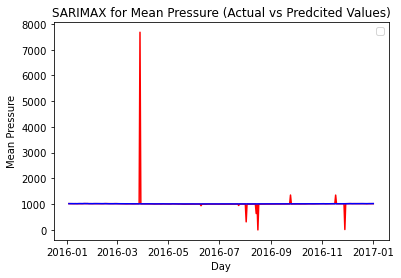

In [151]:
plt.plot(test, color="red")
plt.plot(predicted, color="blue")
plt.title("SARIMAX for Mean Pressure (Actual vs Predcited Values)")
plt.xlabel("Day")
plt.ylabel("Mean Pressure")
plt.legend()
plt.show()

In [152]:
import math
from sklearn.metrics import mean_squared_error 

In [154]:
RMSE = math.sqrt(mean_squared_error(test, predicted)) 

In [155]:
RMSE

360.13204607731086